In [109]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
import datetime
import numpy as np

# read in data
import pandas as pd

# clean data
data = pd.read_csv('../src/data/historical_price_data_wol.csv', sep=';')
data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by='date')
data = data.drop(['Unnamed: 0', 'label', 'acceptedDate', 'reportedCurrency', 'period', 'symbol', 'date', 'fillingDate'], axis=1)
data_pca = data.copy()
# normalize
transformer = RobustScaler(quantile_range=(5.0, 95.0)).fit(data)
data = pd.DataFrame(transformer.transform(data), columns=data.columns)
data_labels = data.columns.tolist()
def label_to_idx(label):
    return data_labels.index(label)

# format input & output data
output_labels = ['high']
input_data = data.drop(output_labels, axis=1)
output_data = data[output_labels]
output_data_relative = output_data.copy()
for index, row in output_data.iterrows():
    if index == 0 or output_data['high'][index-1] == 0: continue
    output_data_relative['high'][index] = 1000 *(output_data['high'][index] - output_data['high'][index-1]) / output_data['high'][index-1]

rows = input_data.values
labels = input_data.columns
input_labels = input_data.columns
input_labels_number = len(input_labels)


def assess_time_correlation(tc) -> [str]:
    max_pvals = [np.Infinity] * input_labels_number
    for i, day_correlation in enumerate(tc):
        feature_sum = 0
        for i, pval in enumerate(day_correlation[1]):
            if pval != 0 and pval < max_pvals[i]:
                max_pvals[i] = pval

    avg = sum(max_pvals) / len(max_pvals)
    sorted_indicies = np.argsort(max_pvals)
    print("above average features: \n")
    for i, idx in enumerate(sorted_indicies):
        if i > 3: break
        print("{}: {}".format(input_labels[idx], max_pvals[idx]))
    return max_pvals

def assess_p_correlation(tc) -> [str]:
    max_corr = [0] * (len(data_labels) + 1)
    # max_day
    for day, day_correlation in enumerate(tc):
        output_idx = label_to_idx(output_labels[0])
        output_row = day_correlation[output_idx]
        for feature_idx, corr in enumerate(output_row):
            if corr != 0 and feature_idx != output_idx and abs(corr) > abs(max_corr[feature_idx]):
                max_corr[feature_idx] = corr

    sorted_indicies = np.argsort(max_corr, )
#     print("above average features: \n")
#     for i, idx in enumerate(reversed(sorted_indicies)):
#         # if i > 3: break
#         if idx > len(data_labels) or idx > len(max_corr): break
#         print("{}: {}".format(data_labels[idx], max_corr[idx]))
    labels_corr = {}
    for i, idx in enumerate(reversed(sorted_indicies)):
        try:
            labels_corr[data_labels[idx]] = max_corr[idx]
        except:
            continue
    return labels_corr

# time_correlation[10] - p values for each column when shifted 10 days back
time_correlation = []
for i in range(0, 10):
    # corr = f_regression(input_data, output_data)
    corr = np.corrcoef(np.transpose(data))
    time_correlation.append(corr)
    output_data_relative = pd.concat([pd.Series(0), output_data_relative])
    input_data = pd.concat([pd.DataFrame(0, index=np.arange(1), columns=labels), input_data])

# define feature selection
# fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
# X_selected = fs.fit_transform(rows, output_data)

features_corr = assess_p_correlation(time_correlation)


c:\users\robert\pycharmprojects\traidingbotv2\venv\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\robert\pycharmprojects\traidingbotv2\venv\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


c:\users\robert\pycharmprojects\traidingbotv2\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\robert\pycharmprojects\traidingbotv2\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


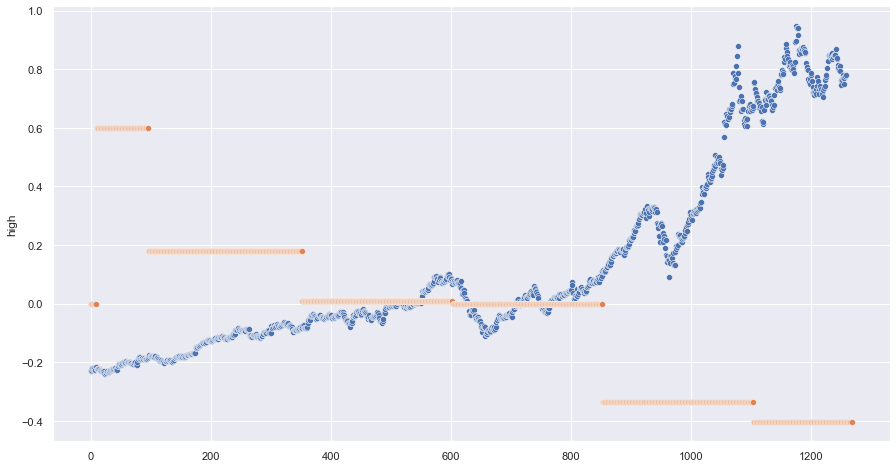

In [186]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
# plt.ylim(-4, 4)
import seaborn as sns
idx = 1
feature = 'ebitPerRevenue'
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
# sns.scatterplot(input_data['close'], output_data["high"]).plot()
sns.scatterplot(range(output_data.shape[0]), output_data["high"]).plot()
# sns.scatterplot(range(input_data.shape[0]), input_data["vwap"]).plot()
ax = sns.scatterplot(range(input_data.shape[0]), input_data[feature] ).plot()
#_ = plt.xlabel(xlabel=feature + "({})".format(label_corr[feature]))

#open, close, low, volume, debtEquityRatio, freeCashFlowPerShare, incomeBeforeTaxRatio, ebitPerRevenue, grossProfit, longTermDebtToCapitalization, enterpriseValueMultiple, capitalExpenditure

In [111]:
features_corr

{'vwap': 0.9998783172267677,
 'open': 0.999766981294311,
 'close': 0.9997031358140256,
 'adjClose': 0.9996794351118018,
 'low': 0.9995943524500437,
 'priceCashFlowRatio': 0.9322636901057056,
 'priceToOperatingCashFlowsRatio': 0.9322636901057056,
 'priceEarningsRatio': 0.9226305685807826,
 'companyEquityMultiplier': 0.9211688547235157,
 'debtEquityRatio': 0.9211688547235154,
 'enterpriseValueMultiple': 0.9196020168322253,
 'priceToSalesRatio': 0.919092727465058,
 'priceSalesRatio': 0.919092727465058,
 'priceBookValueRatio': 0.9142133022568062,
 'priceToBookRatio': 0.9142133022568062,
 'priceFairValue': 0.9142133022568062,
 'priceToFreeCashFlowsRatio': 0.9139276186528973,
 'generalAndAdministrativeExpenses': 0.9043337072983171,
 'longTermDebtToCapitalization': 0.9006455892581191,
 'otherNonCurrentAssets': 0.89703451760963,
 'stockBasedCompensation': 0.8958003864643387,
 'operatingExpenses': 0.8941244098217457,
 'cashAtBeginningOfPeriod': 0.8919758638045534,
 'commonStock': 0.891938509683

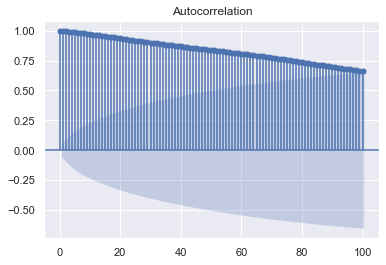

In [190]:

from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(input_data['vwap'], lags=100)
pyplot.show()

In [113]:
def difference(dataset, interval):
        diff = list()
        for i in range(interval, len(dataset)):
            value=dataset[i]-dataset[i-interval]
            diff.append(value)
        return pd.DataFrame(diff, colums = ["Diff"])
diff_level = difference()

TypeError: difference() missing 2 required positional arguments: 'dataset' and 'interval'

<ipython-input-114-ac04fa075040>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(input_data['freeCashFlow'], model ='additive', freq=30)


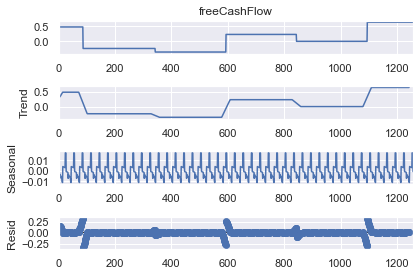

In [114]:
### from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(input_data['freeCashFlow'], model ='additive', freq=30)
result.plot()
pyplot.show()

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = data_pca.values
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [181]:
#pd.DataFrame(pca.n_components_, columns = data_pca.columns)

#n_pcs = pca.n_components_
#most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
#initial_feature_names = data_pca.colums
#most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
#pd.DataFrame(pca.components_, colums = data_pca.colums)

AttributeError: 'DataFrame' object has no attribute 'colums'

In [138]:
n_components = 'mle' 
svd_solver = 'full'

pca = PCA()
X_pca = pca.fit(X_std)#pca.fit(data)
#print(pca.components_)
#print(pca.explained_variance_)
#print(pca.explained_variance_ratio_)
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,5.363510e-01
1,1.916924e-01
2,1.291072e-01
3,7.382548e-02
4,3.423543e-02
...,...
154,4.990880e-33
155,4.111441e-33
156,1.808646e-33
157,1.592868e-33


Text(0, 0.5, 'cumulative explained variance')

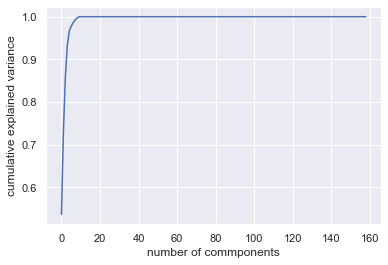

In [130]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of commponents')
plt.ylabel('cumulative explained variance')

In [182]:
num_components = 20
pca = PCA(num_components)
#X_pca = pca.fit_transform(X_std)
X_pca = pca.fit_transform(data)

In [183]:
print(pca.n_components_)

20


In [184]:
df = pd.DataFrame(pca.components_, columns = data_pca.columns)


In [185]:
maxValuesObj = df.max(axis=1)
#maxValuesObj = df.nlargest(2)
maxValuesObjidx = df.idxmax(axis=1)
print(df.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=4))
print('Maximum value in each row : ')
print(maxValuesObj)
print("{}: {}", maxValuesObj, maxValuesObjidx)
       

                                           0                             1  \
0                             changeOverTime                     cashRatio   
1                            netIncomePerEBT                 costOfRevenue   
2                           payablesTurnover    otherNonCurrentLiabilities   
3                            operatingIncome               incomeBeforeTax   
4                 priceEarningsToGrowthRatio                   otherAssets   
5                         otherCurrentAssets  othertotalStockholdersEquity   
6                           unadjustedVolume                        volume   
7                                     change              unadjustedVolume   
8                              changePercent              unadjustedVolume   
9                                       open                          high   
10                                      open                          high   
11                                      open                    

In [ ]:

for index_r, row in df.iterrows():
    for index_c, column in df.itercolumns():
        print(df.columns)
        